## **IMPORTES**

In [1]:
# Data handling
import pandas as pd
import numpy as np

# Pre-processing data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

## **INTEGRAÇÃO DE DADOS**

In [2]:
train = pd.read_csv(filepath_or_buffer="../data/train.csv")
test = pd.read_csv(filepath_or_buffer="../data/test.csv")
df = pd.concat(objs=[train, test], axis=0, ignore_index=True, copy=True)

## **LIMPEZA DE DADOS**

- Regressão Linear é sensível a outliers na coluna alvo

In [3]:
# Remoção de colunas não numéricas
df = df.select_dtypes(exclude=['object'])
df.drop(columns=['pctsomecol18_24'], inplace=True)

<Axes: ylabel='target_deathrate'>

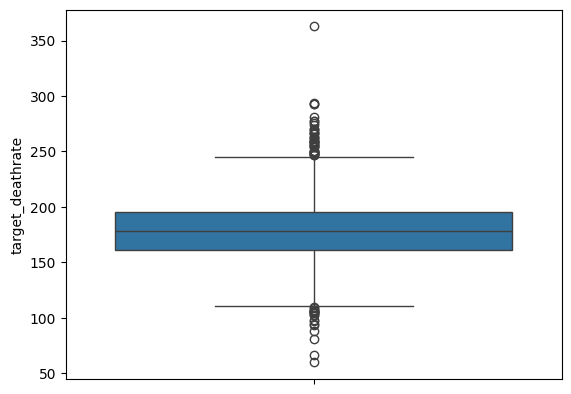

In [4]:
sns.boxplot(df['target_deathrate'])

In [5]:
print(df[(df['target_deathrate'] < 260)  & (df['target_deathrate'] > 100)].shape)
print(df.shape)

(3019, 31)
(3047, 31)


<Axes: ylabel='target_deathrate'>

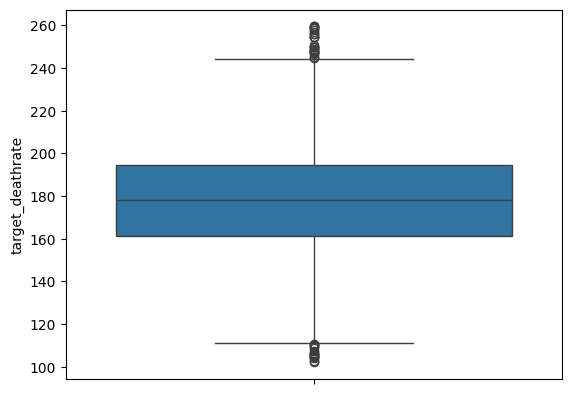

In [6]:
df = df[(df['target_deathrate'] < 260)  & (df['target_deathrate'] > 100)]
sns.boxplot(df['target_deathrate'])

## **AMOSTRAGEM DE DADOS**

In [7]:
X = df.drop(columns=['target_deathrate'])
y = df['target_deathrate']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

In [8]:
print(y_train.shape)
print(X_train.shape)
print(y_test.shape)
print(X_test.shape)

(2415,)
(2415, 30)
(604,)
(604, 30)


## **VALORES FALTANTES**

In [9]:
pd.DataFrame(data={
    "Percentual (%)": round((X_train.isnull().sum()[(X_train.isnull().sum() > 0)] / X_train.shape[0]) * 100, 2),
    "Quantidade": X_train.isnull().sum()[(X_train.isnull().sum() > 0)]
})

,Percentual (%),Quantidade
pctemployed16_over,5.3,128
pctprivatecoveragealone,20.5,495


In [ ]:
# Tratamento com preenchimento da média
X_train['pctemployed16_over'] = X_train['pctemployed16_over'].fillna(value=X_train['pctemployed16_over'].mean())
X_train['pctprivatecoveragealone'] = X_train['pctprivatecoveragealone'].fillna(value=X_train['pctprivatecoveragealone'].mean())

In [11]:
pd.DataFrame(data={
    "Percentual (%)": round((X_test.isnull().sum()[(X_test.isnull().sum() > 0)] / X_test.shape[0]) * 100, 2),
    "Quantidade": X_test.isnull().sum()[(X_test.isnull().sum() > 0)]
})

,Percentual (%),Quantidade
pctemployed16_over,3.81,23
pctprivatecoveragealone,17.88,108


In [ ]:
# Tratamento com preenchimento da média
X_test['pctemployed16_over'] = X_test['pctemployed16_over'].fillna(value=X_test['pctemployed16_over'].mean())
X_test['pctprivatecoveragealone'] = X_test['pctprivatecoveragealone'].fillna(value=X_test['pctprivatecoveragealone'].mean())

## **NORMALIZAÇÃO COLUNA ALVO**

In [ ]:
# Aplicação de logarítmo bitwise na coluna alvo
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

<Axes: xlabel='target_deathrate', ylabel='Count'>

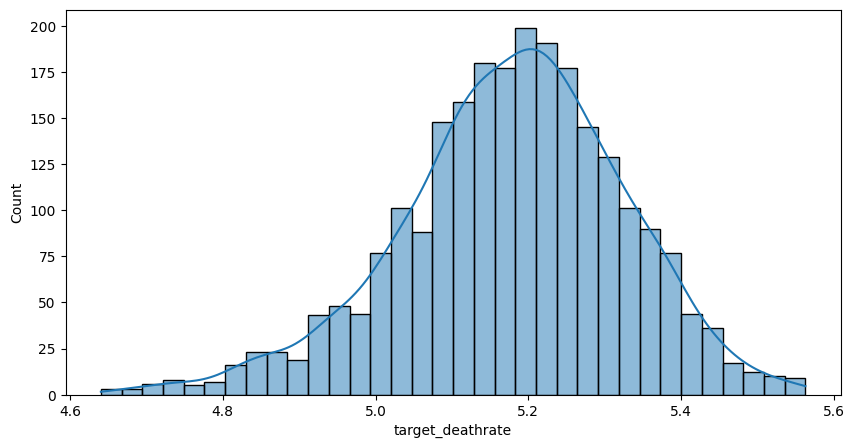

In [14]:
plt.figure(figsize=(10,5))
sns.histplot(data=y_train, kde=True)

<Axes: xlabel='target_deathrate', ylabel='Count'>

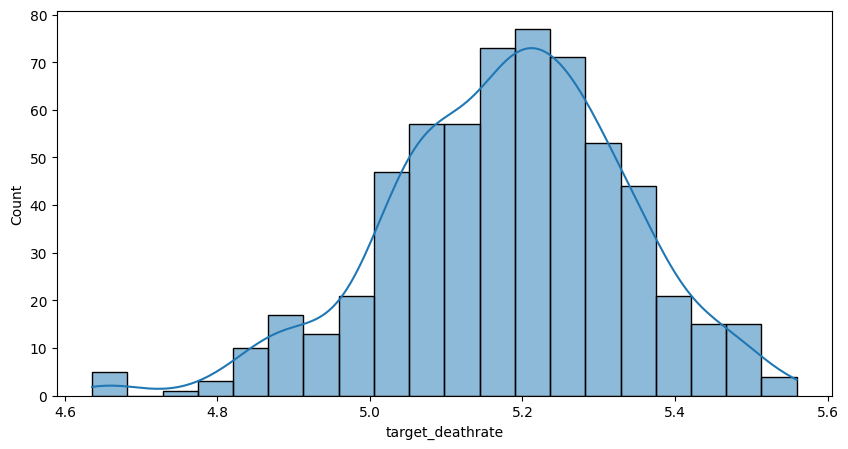

In [15]:
plt.figure(figsize=(10,5))
sns.histplot(data=y_test, kde=True)

## **PADRONIZAÇÃO DOS DADOS**


### $z_{score} = \frac{x - x_{media}}{x_{std}}$

In [ ]:
# Normalização dos atributos para um intervalo entre -1 e 1, utilizando a fórmula do Z score.
scaler = StandardScaler()
scaler.fit(X=X_train)

X_train = scaler.transform(X=X_train)
X_test = scaler.transform(X=X_test)

## **PERSISTINDO DADOS**

In [ ]:
train = pd.DataFrame(data=X_train, columns=df.drop(columns=['target_deathrate']).columns)
train['target_deathrate'] = y_train.to_list()
train.to_csv(path_or_buf='../data/train_process.csv', index=False)
train

,avganncount,avgdeathsperyear,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,medianagefemale,...,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,target_deathrate
0,-0.386416,-0.317125,-0.236827,1.339681,-0.268733,-1.191748,-0.295666,-0.109957,-0.123686,-0.101193,...,1.004784,-0.949129,-1.064491,-0.011249,-0.620319,-0.136768,-0.356942,-0.025568,0.002450,5.286245
1,-0.224542,-0.108481,-0.143081,-0.311583,-0.127816,-0.022412,-0.295666,-0.143282,-0.314245,-0.441900,...,-0.133792,0.308376,0.821591,-0.014540,-0.553038,0.158067,-0.227588,-0.025335,-0.018488,5.279644
2,0.030639,0.072076,-1.484226,5.025856,0.369329,-1.319894,-0.239062,-0.252141,-1.095537,-1.539733,...,1.810380,-2.867796,-2.512733,-0.029445,-0.055417,3.486109,1.131445,-0.037225,-0.021812,4.923624
3,-0.416104,-0.357249,-0.548677,-0.223320,-0.299634,-0.214632,-0.295666,-0.074412,0.619495,-0.290475,...,-0.896424,-0.119435,-0.845571,-0.015694,-0.390432,-0.320284,0.735092,-0.029381,-0.019383,5.101694
4,-0.399139,-0.337187,0.170682,0.732737,-0.286447,-1.095638,-0.295666,-0.025536,0.752886,0.447724,...,1.101455,-0.599102,-0.912931,-0.008896,-0.591788,-0.469782,-0.501579,-0.023218,-0.008452,5.182907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2410,-0.370865,-0.299070,-0.169866,-0.776200,-0.267127,0.217862,-0.295666,-0.029979,0.714774,0.485580,...,-0.294912,0.904718,0.821591,-0.012749,-0.389386,-0.456969,-0.493229,-0.025163,-0.020154,5.241218
2411,1.629582,2.134441,0.088415,-0.351146,1.269132,0.474155,1.114370,-0.129952,-0.390469,-0.176906,...,0.317342,0.217628,0.552150,-0.028172,0.773221,0.287048,-0.373479,-0.035473,-0.021706,5.235910
2412,-0.392778,-0.319131,0.530361,0.035434,-0.279753,0.105734,-0.295666,-0.114401,-0.123686,-0.214762,...,-0.090827,0.126880,0.164830,-0.009867,-0.562656,-0.412360,-0.444633,-0.026008,-0.029962,5.452325
2413,-0.394898,-0.327156,-1.974002,-1.087761,-0.255204,1.483307,-0.295666,-0.305459,-1.781550,-1.331524,...,-1.895363,0.282448,0.973151,-0.028488,-0.345720,-0.328636,5.514298,-0.028436,-0.007155,5.054333


In [18]:
test = pd.DataFrame(data=X_test, columns=df.drop(columns=['target_deathrate']).columns)
test['target_deathrate'] = y_test.to_list()
test.to_csv(path_or_buf='../data/test_process.csv', index=False)
test

,avganncount,avgdeathsperyear,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,medianagefemale,...,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,target_deathrate
0,-0.368037,-0.289039,0.442354,0.063179,-0.266381,-0.022412,-0.295666,-0.072190,0.486103,-0.044409,...,0.252894,-0.326858,-0.592971,-0.011784,-0.452883,-0.310050,-0.476771,-0.027561,-0.012992,5.319100
1,-0.382881,-0.307094,-0.730430,0.419248,-0.267011,-0.326760,-0.295666,-0.138838,-0.123686,-0.574397,...,0.650321,-0.832453,-0.491931,-0.016793,-0.137917,-0.424853,0.067909,-0.024653,-0.022505,5.248076
2,-0.420346,-0.367280,1.737583,-1.067812,-0.299002,1.659508,-0.295666,-0.218816,-0.447636,-1.558662,...,-1.401264,-0.028687,0.973151,-0.020297,-0.492316,-0.508316,2.468864,-0.027491,-0.042361,4.847332
3,-0.387829,-0.321138,1.492695,-0.410324,-0.282757,0.025643,-0.295666,-0.076633,0.104985,0.163801,...,-0.004897,0.749151,0.568990,-0.009139,-0.599916,-0.398017,-0.560927,-0.024675,-0.012438,5.375741
4,0.323990,0.473314,0.140071,0.204751,0.293760,-0.599071,-0.268376,-0.067747,0.257432,0.220586,...,0.134740,-0.313894,-0.273011,-0.018098,0.022457,-0.238360,-0.295793,-0.027109,-0.021604,5.166499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,-0.069737,-0.000147,-0.908356,1.038179,0.267131,0.121752,-0.238571,-0.318789,-1.762494,-1.975081,...,1.241092,-2.012174,-1.434972,-0.019390,-0.390214,0.060928,1.427022,-0.030153,-0.027765,5.013963
600,-0.398433,-0.327156,0.185987,-0.622809,-0.286803,0.378045,-0.068265,-0.045531,0.333656,0.315226,...,-0.649374,0.943610,0.989991,-0.011872,-0.447178,-0.435394,-0.500944,-0.026522,-0.030050,5.393628
601,-0.037928,0.068063,0.874735,-0.662875,-0.047248,0.602301,-0.253950,-0.052195,0.352712,0.428795,...,-0.359359,0.645439,0.754231,-0.019377,-0.227119,0.956611,0.360318,-0.030970,-0.025659,5.241747
602,-0.333400,-0.256940,0.122852,-0.737307,-0.237496,0.474155,-0.295666,-0.076633,0.314600,0.069160,...,-0.004897,0.528763,0.703711,-0.009427,-0.555258,-0.413141,-0.554818,-0.027343,-0.022026,5.249652


## **MATRIZ DE GRÁFICO DE DISPERÇÃO**

In [19]:
sns.pairplot(
    data=train,
    kind='reg',
    plot_kws={'line_kws':{'color':'red'}}
)